https://blog.csdn.net/wang454592297/article/details/80336753

https://www.sfu.ca/~ssurjano/camel3.html

https://programmerclick.com/article/13428601/

In [6]:
!pip install pyswarms
!pip install pygad
;
import pygad
import pyswarms as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 KB 63.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 15.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
import random

In [8]:
random.seed(314592654)
function_inputs = [0,0]

In [9]:
def get_gradient_descent_3D(
                      pos_history,
                      func ,
                      title='Animation', 
                      limits = [(-1,1),(-1,1)], 
                      labels=['x-axis', 'y-axis','z-axis'], 
                      delta = 0.01,
                      mark = (0,0)):

    fig = plt.figure(figsize = (16,8))

    ax = fig.add_subplot(1, 1, 1, projection='3d')

    n_iters = len(pos_history)

    #datos del Plot
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])

    #Datos del grid/mesh
    xlim = limits[0]
    ylim = limits[1]
    x = np.arange(xlim[0], xlim[1], delta)
    y = np.arange(ylim[0], ylim[1], delta)

    #datos para contorno ax
    xx, yy = np.meshgrid(x, y)

    zz = func((xx,yy))

    #Contorno
    ax.plot_surface(xx,yy,zz,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )

    #puntos
    
    ax.scatter(xs= pos_history[:,0], ys=pos_history[:,1], zs=pos_history[:,2],  color='black', marker='o')
    #marca
    ax.scatter(xs=mark[0], ys=mark[1], zs=mark[2], color="red", marker="x")
    
    ax.view_init(45, 220)
    plt.show()

In [10]:
def get_pos_animation(
                      pos_history,
                      func , 
                      limits = [(-1,1),(-1,1)], 
                      labels=['x-axis', 'y-axis','z-axis'],
                      levels = 50, 
                      delta = 0.01, 
                      mark = (0,0)):
    """
    get_pos_animation hace crea la animación 2D de los datos de pos_history, acepta 1 o varios puntos a la vez 
    para animar sus posiciones.
    :param pos_history: numpy array de posiciones de la/las particulas a animar.
    :param func: la función con la cuál se creará la el grid para la visualización en el plot.
    :param limits: Los límites entre los cuáles se graficará el plot. Predeterminado es [xlim=(-1,1),ylim=(-1,1)].
    :param labels: Los labels de los ejes X y Y para el plot. Predeterminado es 'x-axis' y 'y-axis'.
    :param delta: El espaciado entre los puntos para generar la maya dentro de los límites para el plot. Predeterminado es 0.01
                  Si xi = 0, xi+1 = 0.01, xi+2 = 0.02 ...
    :param levels: Niveles en el eje Z de la meshgrid.
    :param mark: La posición (x,y) de dónde ubicar un marcador importante para la optimización, en este caso el mínimo por ejemplo.
    :return: Objeto animation de la librería de matplotlib con la cantidad de frames igual a la cantidad de entradas de pos_history. 
    """

    
    fig,ax = plt.subplots(1,1)

    n_iters = len(pos_history)

    #datos del Plot
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    

    #Datos del grid/mesh
    xlim = limits[0]
    ylim = limits[1]
    x = np.arange(xlim[0], xlim[1], delta)
    y = np.arange(ylim[0], ylim[1], delta)

    #datos para contorno ax
    xx, yy = np.meshgrid(x, y)

    xypairs = np.vstack([xx.reshape(-1), yy.reshape(-1)]).T
    z = np.array(list(map(func, list(xypairs))))
    zz = z.reshape(xx.shape)

    #Contorno
    ax.contour(xx,yy,zz, levels=levels)

    #marca
    ax.scatter(mark[0], mark[1], color="red", marker="x")

    plot = ax.scatter(x=[], y=[], c="black", alpha=0.6)

    plotanim = animation.FuncAnimation(
            fig=fig,
            func=_animate,
            frames=range(n_iters),
            fargs=(pos_history,plot, ax),
            interval = 40,
            repeat = True,
            repeat_delay = None,
            blit = True
    )

    return plotanim


def _animate(i, data, plot, ax):
    
    ax.set_title("Paso "+ str(i+1))
    curr_pos = data[i]
    plot.set_offsets(curr_pos)
    return (plot,)



## Función de Griewank

In [11]:
import math
#Función de Griewank

def griewank(x, solution_idx = 0) -> float:
    """
    griewank calcula el resultado de la función de griewank para [x_1, x_2,..., x_d] con d siendo la cantidad de elementos de x. 
    :param x: d números reales entre [-600,600] en una lista. E.g [300,-300,150].
    :return: Resultado del fitness de x para la función. 
    """

    d : int = len(x)
    suma = 0
    prod = 1

    for i in range(1, d+1):
        xi = x[i-1]
        suma += xi**2 /4000
        prod *= math.cos(xi/math.sqrt(i))

    y : float = suma - prod + 1

    fitness_y : float = -(100 * y)
    return fitness_y
    

In [12]:
import math
#Función de Griewank

def griewankSw(x, solution_idx = 0) -> float:
    """
    griewank calcula el resultado de la función de griewank para [x_1, x_2,..., x_d] con d siendo la cantidad de elementos de x. 
    :param x: d números reales entre [-600,600] en una lista. E.g [300,-300,150].
    :return: Resultado de x para la función. 
    """
    x = list((x.flatten()))
    d : int = len(x)
    suma = 0
    prod = 1

    for i in range(1, d+1):
        xi = x[i-1]
        suma += xi**2 /4000
        prod *= math.cos(xi/math.sqrt(i))

    y : float = suma - prod + 1

    
    return y
    

In [14]:
import math
#Función de Griewank

def griewankDG(x, solution_idx = 0) -> float:
    """
    griewank calcula el resultado de la función de griewank para [x_1, x_2,..., x_d] con d siendo la cantidad de elementos de x. 
    :param x: d números reales entre [-600,600] en una lista. E.g [300,-300,150].
    :return: Resultado de x para la función. 
    """
    #x = list((x.flatten()))
    d : int = len(x)
    suma = 0
    prod = 1

    for i in range(1, d+1):
        xi = x[i-1]
        suma += xi**2 /4000
        prod *= math.cos(xi/math.sqrt(i))

    y : float = suma - prod + 1

        
    return y
    

In [15]:
def griewank_der_2D(x, solution_idx = 0) -> float:
    #x = list(x.flatten())
    if len(x) == 2:
        x1 = x[0] 
        x2 = x[1] 
        return np.array([x1/2000 + np.cos(0.707107 * x2) * np.sin(x1),
        0.0005 * (x2 + 1414.21 *  np.cos(x1) * np.sin(0.707107 * x2))])
    else:
        x1 = x[0] 
        x2 = x[1] 
        x3 = x[2]

In [16]:
griewank_der_2D([1,2])

array([0.13172173, 0.37837646])

In [17]:
griewank([1,2,3])

-101.70279701835734

## Descenso por gradiente

In [28]:
def gradient_descent(vector, funcDer,Lrate, epsilon=0.00132, max_iteraton=10000): 
    punto = np.array(vector)

    arrayPuntos = list()

    for iteration in range(max_iteraton):

        arrayPuntos.append(punto)

        punto = punto - Lrate * funcDer(punto)

        if np.linalg.norm(funcDer(punto)) < epsilon:
            return arrayPuntos, punto, iteration+1,

    return arrayPuntos, punto, max_iteraton

learnRate = 0.04
stopEpsilon = 1e-3

X = [-5, 5]
puntosi, punto_min, iteration = gradient_descent(X,griewank_der_2D,learnRate, stopEpsilon, 250)


puntosi_3D = list(map(list, puntosi))
for punto in puntosi_3D:
  punto.append(griewankDG(punto))

puntosi = np.array(puntosi, dtype=object)
puntosi_3D = np.array(puntosi_3D, dtype=object)


print(f"El punto mínimo es {punto_min}. Y terminó en la iteración {iteration}")


El punto mínimo es [-3.14014055  4.44481027]. Y terminó en la iteración 250


2023-03-15 19:42:36,194 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 19:42:36,196 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


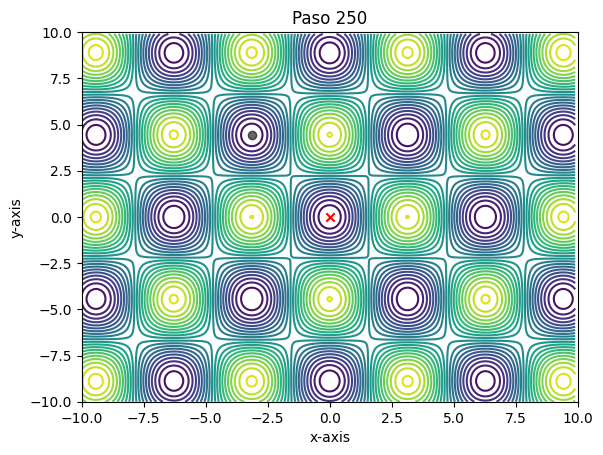

In [30]:
griewankSwGradientAnim = get_pos_animation(puntosi, 
                                      griewankDG, 
                                      limits=[(-10,10),(-10,10)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.1,
                                      levels = 20,
                                      mark=(0,0))

griewankSwGradientAnim.save('griewankGradient2D.gif', writer='imagemagick', fps=10)
Image(url='griewankGradient2D.png')

AttributeError: 'tuple' object has no attribute 'flatten'

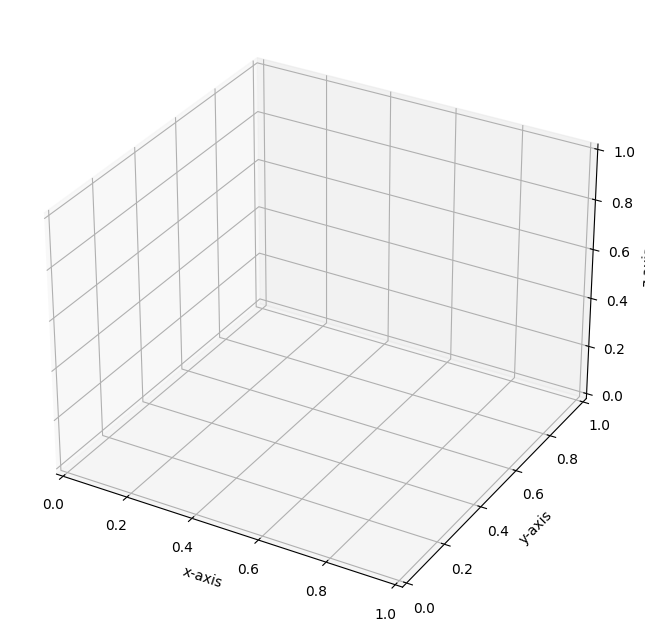

In [140]:
X = [-2,2,2]
puntosPrueba, puntoMin, iteration = gradient_descent(X,griewankDG,learnRate, stopEpsilon)
print(f"El punto mínimo es {puntoMin}. Y terminó en la iteración {iteration}")
get_gradient_descent_3D(puntosi_3D,griewankDG,limits=[(-2,2), (-1,3)], mark=(1,1,0))

### Algoritmo genético PyGAD

Funciones de fitness para la función objetivo. 

In [ ]:
fitness_function = griewank

num_generations = 200
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -100
init_range_high = 100

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=griewank,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/root/venv/lib/python3.9/site-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/root/venv/lib/python3.9/site-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

In [ ]:
ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [28.26516499  4.43668323]
Fitness value of the best solution = -20.47025701881571
Predicted output based on the best solution : 0.0


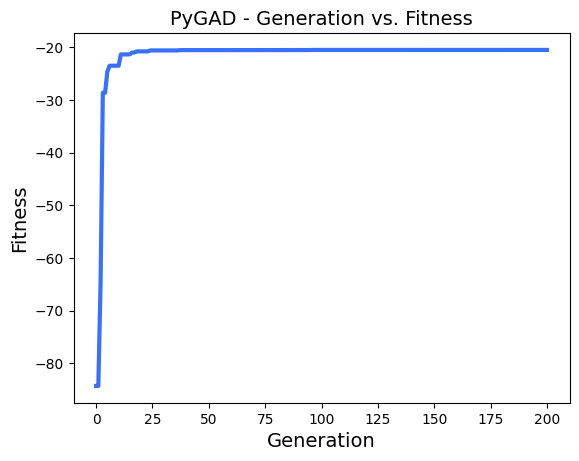

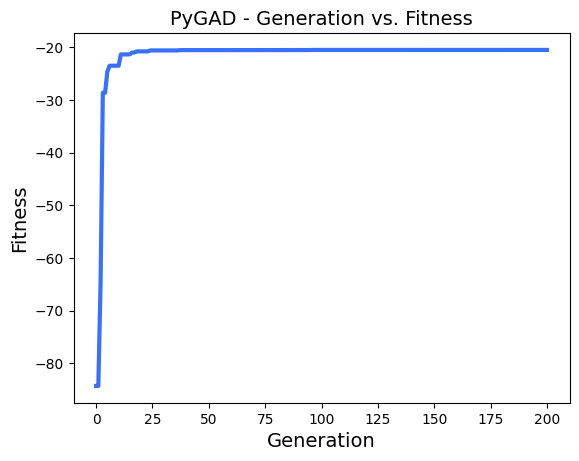

In [ ]:
ga_instance.plot_fitness()

In [ ]:
ga_instance.best_solution()

(array([28.26516499,  4.43668323]), -20.47025701881571, 0)

In [ ]:
soluciones = ga_instance.solutions
len(soluciones)

1608

In [ ]:
j = 1
Pob = np.array(soluciones[j*8:(j+1)*8])
Pob

array([[ 29.44523234,   4.76049642],
       [ 29.44523234, -48.92293339],
       [ 41.31374241,  66.22519792],
       [-25.47605001,  50.66240702],
       [ 29.44523234,   5.27640953],
       [ 30.3637436 , -49.46858836],
       [-46.20493838,  66.7691426 ],
       [-47.08344337,  50.00128569]])

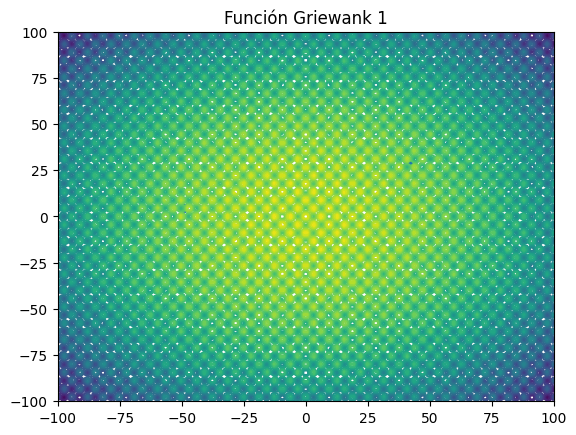

In [ ]:
ncols = 150
nrows = 150
X = np.linspace(-100, 100, ncols)     
Y = np.linspace(-100, 100, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [griewank(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

for j in range(1):
    Pob = np.array(soluciones[j*8:(j+1)*8])
    fig, ax = plt.subplots()
    ax.contour(X,Y,Z, levels = 30)
    ax.scatter(Pob[0], Pob[1])
    plt.title("Función Griewank " + str(j+1))
    plt.show()

In [ ]:
%matplotlib inline

''

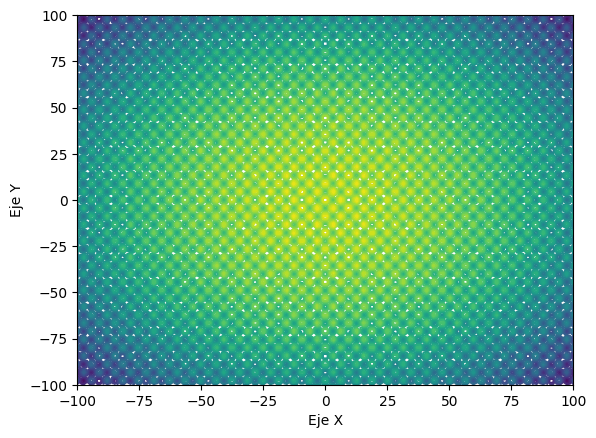

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -100, 100))
ax.set_ylim((-100, 100))
ax.contour(X,Y,Z, levels = 30)
scatter, = ax.plot([], [], lw=2)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
;

In [ ]:
# initialization function: plot the background of each frame

def init():
    scatter.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    ax.set_title("Paso "+ str(i+1))
    Pob = np.array(soluciones[i*8:(i+1)*8])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter, )

In [ ]:
anim = animation.FuncAnimation(fig, animate,
                               frames=50, interval=10, blit=True)

In [ ]:
#anim.save('griewank.gif', writer='imagemagick')


### PySwarms

In [ ]:
#from scipy.optimize import griewank, griewank_der

# r = np.sum(
#       100 * (x.T[1:] - x.T[:-1] ** 2.0) ** 2 + (1 - x.T[:-1]) ** 2.0, axis=0
#    )

#    return r

In [ ]:
%%time

random.seed(3141592654)
c1 = random.random()
c2 = random.random()
w = random.random()
upper = 100 * np.ones(2)
lower = -upper
options = {'c1': c1, 'c2': c2, 'w':w}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds = (lower, upper))
iters : int = 200
cost, pos = optimizer.optimize(griewankSw, iters)

2023-03-15 18:33:32,153 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.44466065954778444, 'c2': 0.21828385485578183, 'w': 0.20345227149297818}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=7.77
2023-03-15 18:33:32,731 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.770574023422497, best pos: [-70.25110985  27.25680691]
CPU times: user 281 ms, sys: 27.9 ms, total: 309 ms
Wall time: 590 ms


In [ ]:
griewankPosHistory = optimizer.pos_history
griewankPosHistory

[array([[-70.49298148,  27.17934806],
        [-59.50698721,  -5.73540099],
        [ 48.39462379, -76.77589249],
        [-77.8178559 , -82.98230593],
        [-10.62958375, -96.04147963],
        [ 43.33941765,  -1.70162505],
        [-43.35487394, -53.06664294],
        [-12.07633274, -38.20316536],
        [ 36.45770652, -32.49405061],
        [  4.064955  , -49.00092684]]),
 array([[-70.300252  ,  27.24106925],
        [-60.47104236,  -1.54791971],
        [ 22.46348964, -67.10321141],
        [-76.41714215, -71.94812364],
        [-15.50261795, -75.98927225],
        [ 30.06034665,   0.49557103],
        [-45.86247958, -50.49673911],
        [-22.55651014, -33.3664033 ],
        [ 35.65269922, -20.5104735 ],
        [ -2.87833676, -45.30919455]]),
 array([[-70.26104075,  27.25362656],
        [-62.52261598,   4.21571258],
        [ 16.56612369, -63.81976979],
        [-76.1130463 , -51.36911525],
        [-20.45366977, -54.85743717],
        [ 12.26865827,   2.22124181],
        

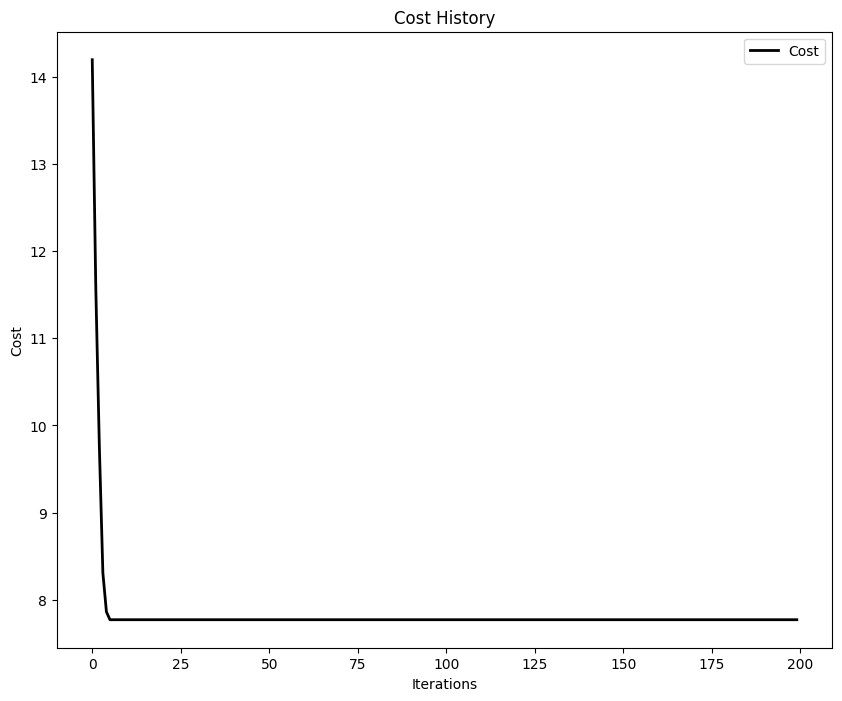

In [ ]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [ ]:
ncols = 150
nrows = 150
X = np.linspace(-100, 100, ncols)     
Y = np.linspace(-100, 100, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [griewank(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])


Text(0, 0.5, 'Eje Y')

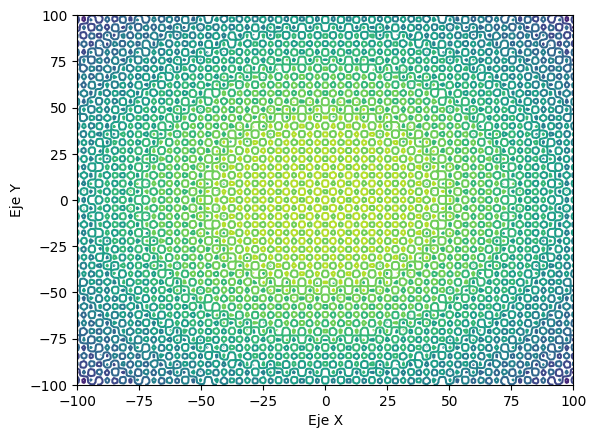

In [ ]:
fig, ax = plt.subplots(1,1)

ax.set_xlim(( -100, 100))
ax.set_ylim((-100, 100))
ax.contour(X,Y,Z, levels = 10)
scatter = ax.scatter(x=[], y=[],s=200, color="black", alpha=1, marker="x",)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

In [ ]:
# animation function. This is called sequentially
def animate(i):
    ax.set_title("Paso "+ str(i+1))
    Pob = griewankPosHistory[i]
    scatter.set_offsets(Pob)
    return (scatter, )

In [ ]:
anim = animation.FuncAnimation(fig, animate,
                               frames=200, interval=10, blit=True)

In [ ]:
anim.save('griewankSW.gif', writer='imagemagick')

2023-03-15 18:33:33,931 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 18:33:33,932 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Evolución diferencial

the minimum point is x 
[-4.182766174351485e-06, -4.005371210148047e-06]
the minimum value is y 
2.549360722525762e-09


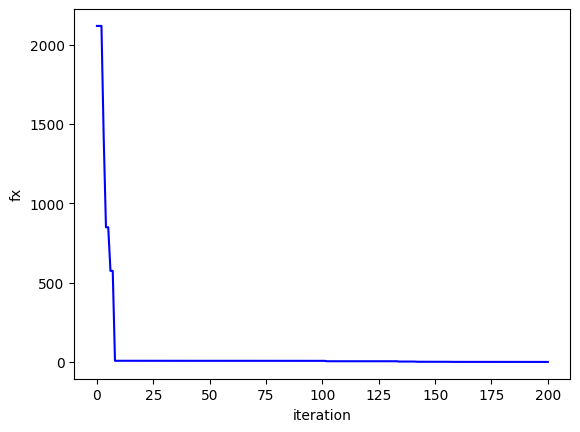

In [37]:
# -*- coding: cp936 -*-
import math
 
# Función Griewank
def object_function(fn, x):
    return -fn(x)

 # Inicialización de la población
def initialtion(NP, len_x, value_down_range, value_up_range):
    np_list = [] # población, cromosoma
    for i in range(0,NP):
        x_list = [] # individual, gen
        for j in range(0,len_x):
            x_list.append(value_down_range + random.random() * (value_up_range - value_down_range))
        np_list.append(x_list)
    return np_list
 # Restar lista
def substract(a_list,b_list):
    a = len(a_list)
    new_list = []
    for i in range(0,a):
        new_list.append(a_list[i]-b_list[i])
    return new_list
 # Agregar listas
def add(a_list,b_list):
    a = len(a_list)
    new_list = []
    for i in range(0,a):
        new_list.append(a_list[i]+b_list[i])
    return new_list
 # Lista de multiplicación
def multiply(a,b_list):
    b = len(b_list)
    new_list = []
    for i in range(0,b):
        new_list.append(a * b_list[i])
    return new_list
 # Variación
def mutation(np_list, NP, F):
    v_list = []
    for i in range(0,NP):
        r1 = random.randint(0,NP-1)
        while r1 == i:
            r1 = random.randint(0,NP-1)
        r2 = random.randint(0,NP-1)
        while r2 == r1 | r2 == i:
            r2 = random.randint(0,NP-1)
        r3 = random.randint(0,NP-1)
        while r3 == r2 | r3 == r1 | r3  == i:
            r3 = random.randint(0,NP-1)
        
        v_list.append(add(np_list[r1], multiply(F, substract(np_list[r2],np_list[r3]))))
    return v_list
 # Cruz
def crossover(np_list,v_list, NP, len_x, CR):
    u_list = []
    for i in range(0,NP):
        vv_list = []
        for j in range(0,len_x):
            if (random.random() <= CR) | (j == random.randint(0,len_x - 1)):
                vv_list.append(v_list[i][j])
            else:
                vv_list.append(np_list[i][j])
        u_list.append(vv_list)
    return u_list
 # Seleccionar
def selection(u_list,np_list, fn, NP):
    for i in range(0,NP):
        if object_function(fn, u_list[i]) <= object_function(fn, np_list[i]):
            np_list[i] = u_list[i]
        else:
            np_list[i] = np_list[i]
    return np_list
 # Función principal
def EDPrincipal(fn, NP, F, CR, generation, len_x, value_up_range, value_down_range):
    """
    función usando ED para una función fn. 
    :fn: función a evaluar
    :NP: Población
    :F: Factor de Zoom
    :CR: Probabilidad de Cruce
    :generation: álgebra genética
    :len_x: el valor d (la cantidad de elementos en la lista x)
    :value_up_range: cota inferior de los valores de x
    :value_down_range: cota superior de los valores de x
    :return: min_xx, min_x, min_ff, generation, min_f
    """
    
    np_list = initialtion(NP, len_x, value_down_range, value_up_range)
    min_x = []
    min_f = []
    for i in range(0,NP):
        xx = []
        xx.append(object_function(fn, np_list[i]))
    min_f.append(min(xx))
    min_x.append(np_list[xx.index(min(xx))])
    for i in range(0,generation):
        v_list = mutation(np_list, NP, F)
        u_list = crossover(np_list,v_list, NP, len_x, CR)
        np_list = selection(u_list,np_list, fn, NP)
        for i in range(0,NP):
            xx = []
            xx.append(object_function(fn, np_list[i]))
        min_f.append(min(xx))
        min_x.append(np_list[xx.index(min(xx))])
    # Salida
    min_ff = min(min_f)
    min_xx = min_x[min_f.index(min_ff)]
    return min_xx, min_x, min_ff, generation, min_f

#Driver Code
min_xx, min_x, min_ff, generation, min_f = EDPrincipal(griewank,100,0.6,0.7,200,2,-600,600)
print('the minimum point is x ')
print(min_xx)
print('the minimum value is y ')
print(min_ff)
 # Dibujo
x_label = np.arange(0,generation+1,1)
plt.plot(x_label,min_f,color = 'blue')
plt.xlabel('iteration')
plt.ylabel('fx')
plt.savefig('./iteration-f.png')
plt.show()

In [ ]:
print(min_x,"\n", min_f)

[[227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373

Text(0, 0.5, 'Eje Y')

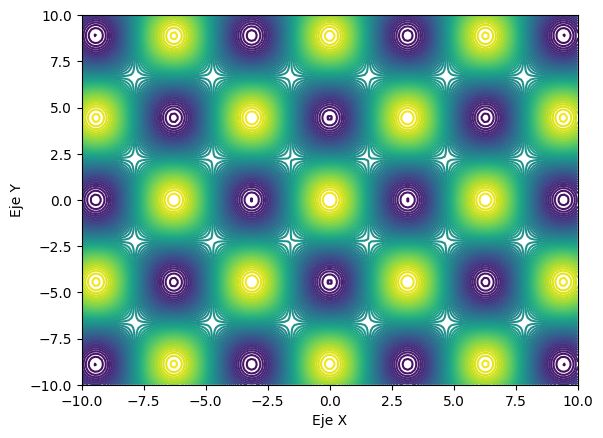

In [ ]:
ncols = 150
nrows = 150
X = np.linspace(-10, 10, ncols)     
Y = np.linspace(-10, 10, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [griewank(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

fig, ax = plt.subplots()

ax.set_xlim(( -10, 10))
ax.set_ylim((-10, 10))
ax.contour(X,Y,Z, levels = 50)
scatter, = ax.plot([], [], lw=2)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

2023-03-15 18:34:05,136 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 18:34:05,139 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


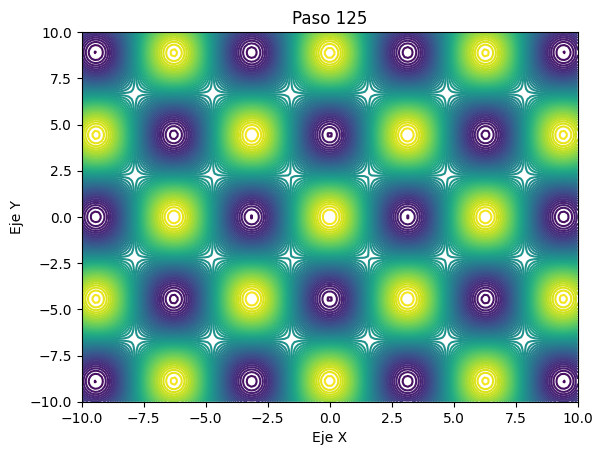

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -10, 10))
ax.set_ylim((-10, 10))
ax.contour(X,Y,Z, levels = 50)
scatter, = ax.plot([], [], lw=2)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
def init():
    scatter.set_data([], [])
    return (scatter,)
    
listax1 = list()
listax2 = list()
for lista in min_x:
    listax1.append((lista[0]))
    listax2.append((lista[1]))

def __animate(i):
    ax.set_title("Paso "+ str(i+1))
    scatter.set_data([listax1[i:i+20],listax2[i:i+20]])
    return (scatter, )

anim = animation.FuncAnimation(fig, __animate, init_func=init,
                               frames=125, interval=10, blit=True)
anim.save('griewankED.gif', writer='imagemagick')

In [ ]:
print(listax1,"\n", listax2)

[227.07556987624446, 227.07556987624446, 227.07556987624446, 227.07556987624446, 227.07556987624446, -25.65498462948294, -25.65498462948294, -25.65498462948294, -25.65498462948294, -25.65498462948294, -47.869197524850556, -47.869197524850556, -47.869197524850556, -47.869197524850556, -47.869197524850556, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -1.1093654557373078, -11.599202238352918, -22.76077606537612, -22.76077606537612, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, 7.060636573781362, -0.3629733488512197, -

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def graficar(X,Y,Z,z_max, title, z_min=0):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap = plt.cm.hot)
    ax.set_zlim(z_min,z_max)
    ax.set_ttle(title)
    plt.show()

## 

## Rosenbrock

In [27]:
def rosenBrock_fit(x, solutionidx=0):
    f = sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

    fitness : float = -(100 * f)
    #return f
    return fitness

In [41]:
def rosenBrock_fitWL2D(x, solutionidx=0): #withList
    f = 100.0*(x[1] - x[0]**2.0)**2.0 + (1 - x[0])**2.0
    fitness : float = -(100 * f)

    return fitness

In [42]:
print(rosenBrock_fit(np.array([1,2])))
print(rosenBrock_fitWL2D([1,2]))

-10000.0
-10000.0


### PySwarms

In [94]:
%%time
from pyswarms.utils.functions import single_obj as fx
from scipy.optimize import rosen, rosen_der

options = {'c1': 0.3, 'c2': 0.5, 'w':0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
iters : int = 100
cost, pos = optimizer.optimize(fx.rosenbrock, iters)

2023-03-15 20:28:35,939 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.3, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000109
2023-03-15 20:28:36,228 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00010860767941539039, best pos: [1.00636266 1.01359119]
CPU times: user 139 ms, sys: 20.3 ms, total: 160 ms
Wall time: 304 ms


In [95]:
psPosHistory = optimizer.pos_history
psPosHistory

[array([[0.30557438, 0.40546606],
        [0.85305342, 0.96476546],
        [0.03354944, 0.19796986],
        [0.64460826, 0.95673234],
        [0.35585866, 0.55074626],
        [0.15777621, 0.31380457],
        [0.71161781, 0.15105829],
        [0.92774483, 0.3657545 ],
        [0.70905783, 0.36797313],
        [0.30323805, 0.92935141]]),
 array([[0.81183265, 0.64132947],
        [1.03006092, 1.53448625],
        [1.02991538, 0.45532304],
        [0.70093157, 0.93142426],
        [1.32660569, 0.67549065],
        [1.07093177, 0.74161682],
        [1.55907157, 1.09018538],
        [1.11496582, 0.41490069],
        [1.29043773, 0.82570574],
        [0.55425617, 1.44929951]]),
 array([[1.26746508, 0.85360653],
        [1.06979998, 1.68950592],
        [1.71947247, 0.74829195],
        [0.77815971, 0.85344837],
        [2.07162053, 0.7715913 ],
        [1.63421863, 0.98028494],
        [2.02854362, 1.4500628 ],
        [1.1973802 , 0.55717068],
        [1.69698694, 1.07930317],
        [0

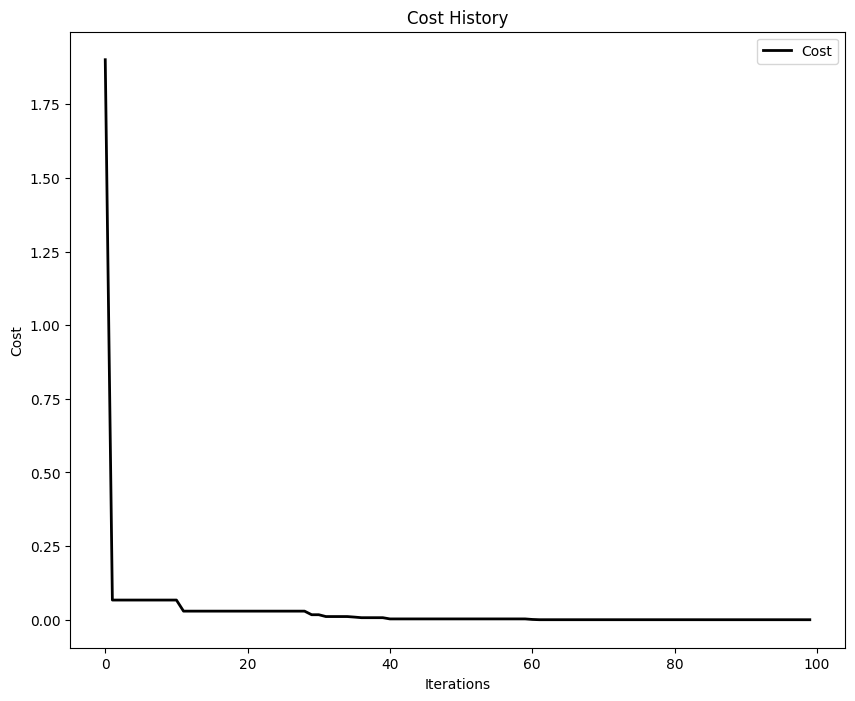

In [96]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [97]:
from IPython.display import Image
from pyswarms.utils.plotters.formatters import Mesher, Designer, Animator


In [98]:
m = Mesher(func=fx.rosenbrock,limits=[(-1,3), (-1,3)],levels=50, delta=0.01) 
d = Designer(limits=[(-1,3), (-1,3)], label=['x-axis', 'y-axis', 'z-axis'])

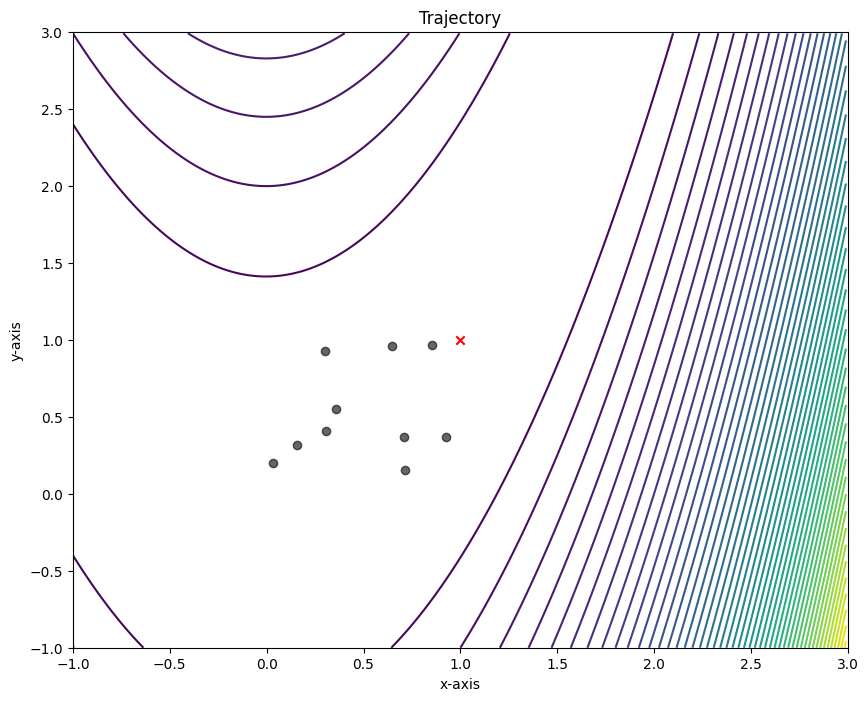

In [99]:

# Make animation
animat = plot_contour(pos_history=psPosHistory, 
                         mesher=m, designer=d,
                         mark=(1,1))

In [100]:
animat.save('./RosenbrockGifs/rosenbrockSwarm.gif', writer='imagemagick', fps=10)
Image(url='./RosenbrockGifs/rosenbrockSwarm.gif')


2023-03-15 20:29:08,525 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 20:29:08,529 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Descenso por gradiente

In [68]:
def gradient_descent(vector, funcDer,Lrate, epsilon=0.00132, max_iteraton=10000): 
    punto = np.array(vector)

    arrayPuntos = list()

    for iteration in range(max_iteraton):

        arrayPuntos.append(punto)

        punto = punto - Lrate * funcDer(punto)

        if np.linalg.norm(funcDer(punto)) < epsilon:
            return arrayPuntos, punto, iteration+1,

    return arrayPuntos, punto, max_iteraton

In [69]:
learnRate = 0.00132
stopEpsilon = 1e-3

X = [-2,2]
puntosi, punto_min, iteration = gradient_descent(X,rosen_der,learnRate, stopEpsilon, 150)


puntosi_3D = list(map(list, puntosi))
for punto in puntosi_3D:
  punto.append(rosen(punto))

puntosi = np.array(puntosi, dtype=object)
puntosi_3D = np.array(puntosi_3D, dtype=object)


print(f"El punto mínimo es {punto_min}. Y terminó en la iteración {iteration}")

El punto mínimo es [1.00924654 1.01861537]. Y terminó en la iteración 150


In [70]:
X = [-2,2,2]
puntosPrueba, puntoMin, iteration = gradient_descent(X,rosen_der,learnRate, stopEpsilon)
print(f"El punto mínimo es {puntoMin}. Y terminó en la iteración {iteration}")

El punto mínimo es [1.00045757 1.00091709 1.0018394 ]. Y terminó en la iteración 7158


2023-03-15 20:12:55,799 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 20:12:55,801 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


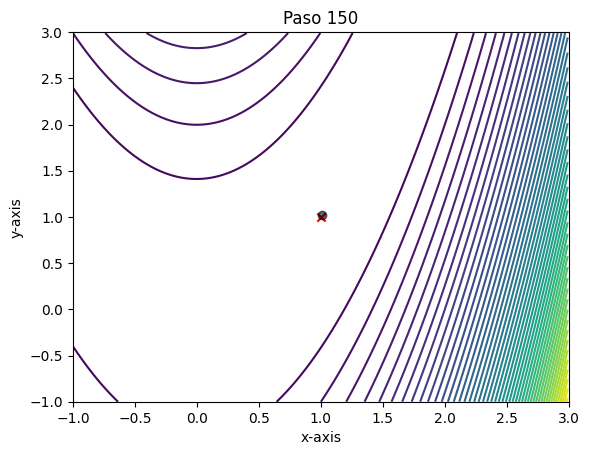

In [78]:
rosenGradientAnim = get_pos_animation(puntosi, 
                                      rosen, 
                                      limits=[(-1,3),(-1,3)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.01,
                                      mark=(1,1))

rosenGradientAnim.save('rosenbrockGradient2D.gif', writer='imagemagick', fps=10)
Image(url='rosenbrockGradient2D.png')

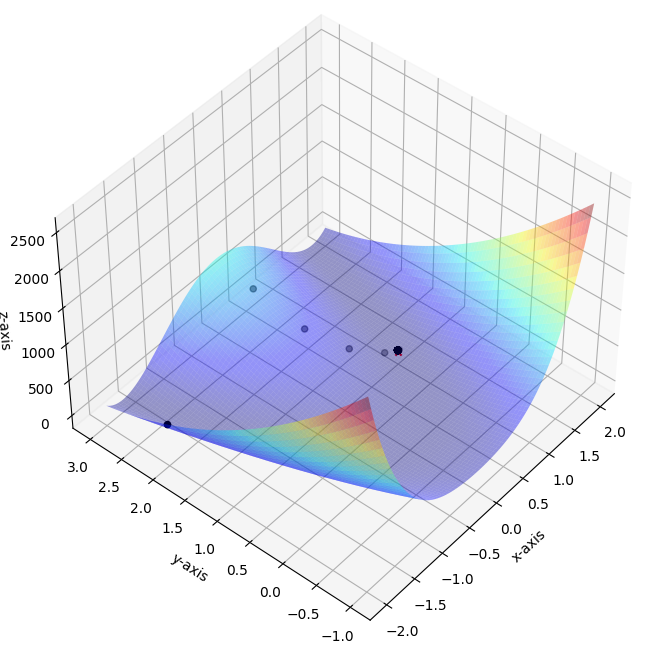

<Figure size 640x480 with 0 Axes>

In [80]:
get_gradient_descent_3D(puntosi_3D,rosen,limits=[(-2,2), (-1,3)], mark=(1,1,0))

### Algoritmo genérico PyGAD

In [79]:
function_inputs = np.array([-.5,2])
fitness_function = rosenBrock_fit

num_generations = 200
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = 0
init_range_high = 2

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [81]:
ga_rosen_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/root/venv/lib/python3.9/site-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/root/venv/lib/python3.9/site-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

In [82]:
ga_rosen_instance.run()

In [83]:
rosen_solution, rosen_solution_fitness, rosen_solution_idx = ga_rosen_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=rosen_solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=rosen_solution_fitness))

rosen_prediction = np.sum(np.array(function_inputs)*rosen_solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=rosen_prediction))

Parameters of the best solution : [1.01764715 1.03730623]
Fitness value of the best solution = -0.06005912614694539
Predicted output based on the best solution : 1.5657888783471


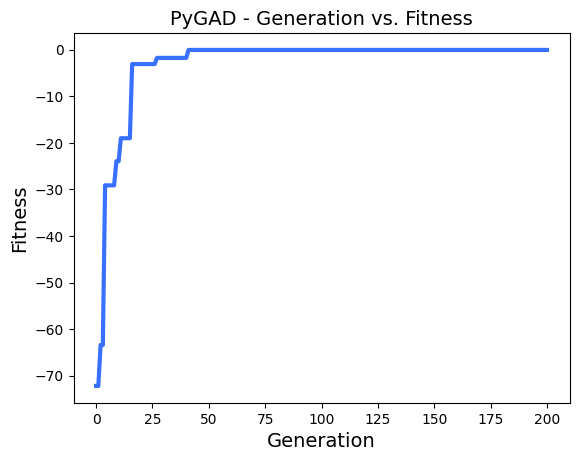

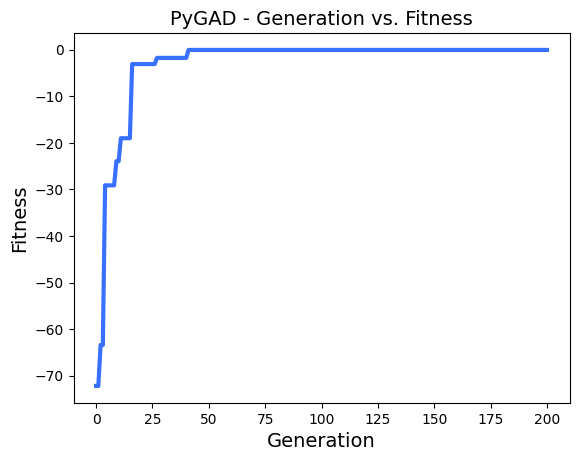

In [84]:
ga_rosen_instance.plot_fitness()

In [85]:
ga_rosen_instance.best_solution()

(array([1.01764715, 1.03730623]), -0.06005912614694539, 0)

In [86]:
ga_rosen_soluciones = ga_rosen_instance.solutions
ga_rosen_soluciones

[[0.8354928748074537, 1.9024612863933483],
 [0.1929580200444494, 1.2833364280157935],
 [0.4925536095942791, 0.17446645449040887],
 [0.046082248582773655, 1.2655959557672554],
 [1.9606279974035088, 1.8695708982358488],
 [0.9138759351259775, 1.9861336204742093],
 [1.95105699947433, 1.1856516724921948],
 [1.2352809846713013, 0.43470607624192725],
 [0.4925536095942791, 0.17446645449040887],
 [0.4925536095942791, 0.5132520292071237],
 [0.9138759351259775, 1.5794597024121073],
 [0.9345010440243564, 1.9024612863933483],
 [0.8354928748074537, -0.4249427223124125],
 [0.9589468928538416, 0.43470607624192725],
 [0.9138759351259775, 2.2984984067737657],
 [0.9138759351259775, 1.9901121257623589],
 [0.4925536095942791, 0.17446645449040887],
 [0.6186478246201923, 0.5132520292071237],
 [0.4555275368088585, 0.43470607624192725],
 [1.5678642867452683, 1.5794597024121073],
 [-0.006186675077215487, 0.17446645449040887],
 [0.4925536095942791, 1.0891576909421126],
 [0.4925536095942791, 0.303972189195153],
 

In [87]:
j=1
secuencias = np.array(ga_rosen_soluciones[j*8:(j+1)*8])
secuencias

array([[ 0.49255361,  0.17446645],
       [ 0.49255361,  0.51325203],
       [ 0.91387594,  1.5794597 ],
       [ 0.93450104,  1.90246129],
       [ 0.83549287, -0.42494272],
       [ 0.95894689,  0.43470608],
       [ 0.91387594,  2.29849841],
       [ 0.91387594,  1.99011213]])

In [88]:
num_soluciones_div_por_num_pops = 201 # 1608/8 

ga_rosen_solutions_separated_by_8 = []

#/////Se separan los valores de soluciones entre 8, ya que se especificó en el modelo de PyGad que fueran soluciones por pop////

for j in range(num_soluciones_div_por_num_pops):
    ga_rosen_solutions_separated_by_8.append(np.array(ga_rosen_soluciones[j*8:(j+1)*8]))


#Queda como array de arrays, siendo los internos de 8 soluciones cada uno

ga_rosen_solutions_separated_by_8 = np.array(ga_rosen_solutions_separated_by_8) 
print(ga_rosen_solutions_separated_by_8[0])

[[0.83549287 1.90246129]
 [0.19295802 1.28333643]
 [0.49255361 0.17446645]
 [0.04608225 1.26559596]
 [1.960628   1.8695709 ]
 [0.91387594 1.98613362]
 [1.951057   1.18565167]
 [1.23528098 0.43470608]]


2023-03-15 20:17:54,415 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 20:17:54,418 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


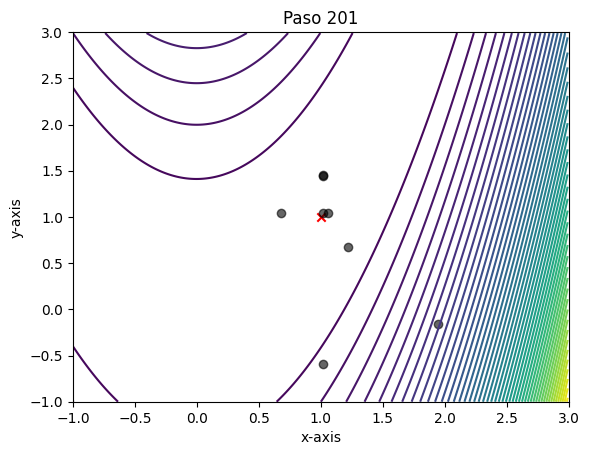

In [89]:
rosenGradientAnim = get_pos_animation(ga_rosen_solutions_separated_by_8, 
                                      rosen, 
                                      limits=[(-1,3),(-1,3)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.01,
                                      mark=(1,1))

rosenGradientAnim.save('./RosenbrockGifs/rosenbrockPyGad2D.gif', writer='imagemagick', fps=10)
Image(url='./RosenbrockGifs/rosenbrockPyGad2D.gif')

### Evolución diferencial

the minimum point is x 
[1.0000702933635777, 1.000148470968774]
the minimum value is y 
1.783878954673351e-06


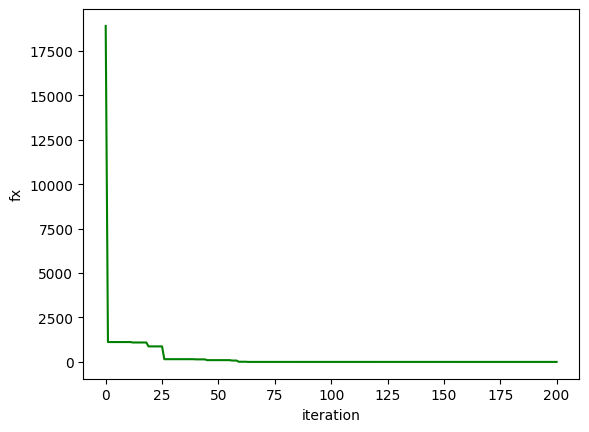

In [54]:
#Driver Code
min_X, minx, min_Y, generation, min_f = EDPrincipal(rosenBrock_fitWL2D,100,-2, 4,200,2,0,2)
print('the minimum point is x ')
print(min_X)
print('the minimum value is y ')
print(min_Y)
 # Dibujo
x_label = np.arange(0,generation+1,1)
plt.plot(x_label,min_f,color = 'green')
plt.xlabel('iteration')
plt.ylabel('fx')
plt.savefig('./rosen-iterations-ED.png')
plt.show()

In [55]:
rosen_ev_dif_pos_history = np.array(minx)
rosen_ev_dif_pos_history

array([[ 0.71998584,  1.04738365],
       [ 0.71998584,  1.04738365],
       [ 0.71998584,  1.04738365],
       [ 0.71998584,  1.04738365],
       [ 0.71998584,  1.04738365],
       [ 0.71998584,  1.04738365],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [ 0.4593718 ,  0.56228846],
       [-0.10217789,  0.155875  ],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,  2.19826827],
       [ 1.52903565,

2023-03-15 20:18:33,488 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-15 20:18:33,491 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


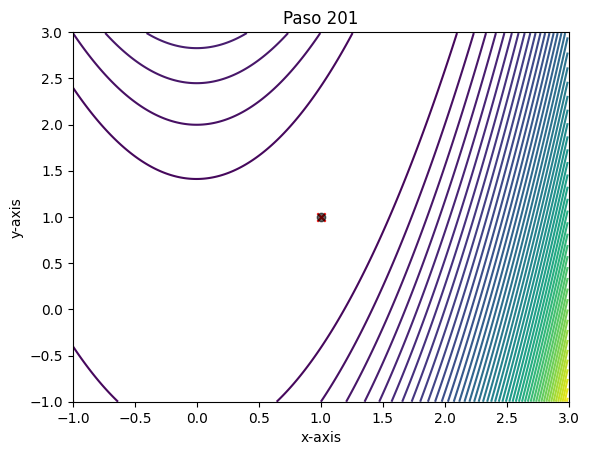

In [91]:
rosen_ev_dif_animation = get_pos_animation(
                                           rosen_ev_dif_pos_history,
                                           rosen,
                                           limits=[(-1,3),(-1,3)],
                                           labels=['x-axis','y-axis'],
                                           levels= 50,
                                           delta=0.01,
                                           mark=(1,1)
                                          )
rosen_ev_dif_animation.save('./RosenbrockGifs/rosenbrockEvDif2D.gif', writer='imagemagick', fps=10)
Image(url='./RosenbrockGifs/rosenbrockEvDif2D.gif')

In [0]:
"""
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [rosenbrock(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

for j in range(50):
    Pob = psPosHistory[j]
    fig, ax = plt.subplots()
    ax.contour(X,Y,Z, levels = 50)
    ax.scatter(Pob[:,0], Pob[:,1])
    plt.title("Función de rosenbrock por particle swarm " + str(j+1))
    plt.show()
"""

Solución al Traveling Salesman Problem

Importamos la base de datos de los municipios a visitar con sus coordenadas

In [0]:
df_ciudades = pd.read_csv("ciudades.csv")
df_ciudades

Procedemos a construír la matriz de costos. La entrada i,j de esta matriz contendrá el costo en pesos de ir de la ciudad i a la ciudad j. Éste, a su vez es la suma del salario por horas del vendedor, costo de los peajes y el costo del combustible en valores del 2023.

Costo hora del vendedor: El salario promedio de un conductor en colombia es de $6.827/hora [https://co.talent.com/salary?job=conductor#:~:text=¿Cuánto%20gana%20un%20Conductor%20en%20Colombia%3F&text=El%20salario%20conductor%20promedio%20en,con%20un%20ingreso%20de%20%2413.200.].

Costo de los peajes: Se estableció el costo de los peajes, el tiempo estimado de viaje y la distancia para cada par de ciudades.[https://viajaporcolombia.com/peajes/]

Costo del combustible: El recorrido se hará en un Mini Cooper 1.6, cuyo rendimiento es de 8,35 litros / 100 km [https://www.spritmonitor.de/es/detalle/125236.html?cdetail=1]. Además, el costo promedio de un litro de gasolina corriente en colombia es de $2.747,31/litro [https://es.globalpetrolprices.com/Colombia/gasoline_prices/#:~:text=El%20valor%20medio%20durante%20este,de%209%2C081.45%20(Colombian%20Peso).]. 

Importamos las tablas de tiempo de viaje, costo de los peajes y distancia entre ciudades.

In [0]:
df_tiempos = pd.read_csv("tiempos.csv")
df_tiempos

In [0]:
df_peajes = pd.read_csv("peajes.csv")
df_peajes

In [0]:
df_distancias = pd.read_csv("distancias.csv")
df_distancias

Calculamos la tabla de costos del vendedor con la tabla de tiempos y su pago por hora.

In [0]:
pago_hora = 6827
df_costo_vendedor = df_tiempos.applymap(lambda x: x*pago_hora if not isinstance(x, str) else x )
df_costo_vendedor

Calculamos la tabla de costos de combustible

In [0]:
consumo = 8.35/100 #litro/km
precio_gasolina = 2747.31 #$/litro
costo_kilometro = precio_gasolina * consumo # $/km
df_costo_combustible = df_distancias.applymap(lambda x: float(x)*costo_kilometro if not isinstance(x, str) else x )
df_costo_combustible

Con estas matrices podemos calcular la matriz de costos totales de viajar entre dos ciudades

In [0]:
df_costo_total = (df_costo_combustible.drop("Distancia", axis=1)+
                    df_costo_vendedor.drop("Tiempo viaje", axis=1)+
                    df_peajes.drop("Costo Peajes", axis=1))
df_costo_total = df_costo_total.set_index(pd.Series(['Armenia', 'Barranquilla', 'Bogota D.C.', 
                                                        'Bucaramanga', 'Cartagena', 'Cucuta', 
                                                        'Manizales', 'Medellin', 'Monteria', 
                                                        'Palmira', 'Pereira', 'Pasto', 'Soledad', 
                                                        'Tulua', 'Valledupar']))
df_costo_total

Optimización utilizando algoritmos genéticos y GIF del proceso

Se utilizó el siguiente repositorio como guía para la implementación de los algoritmos genéticos: https://github.com/manpreet1130/Travelling-Salesman-Problem-with-Genetic-Algorithm

In [0]:
!pip install pygame

In [0]:
import random
import pygame
import sys
import math
import time
import os
os.environ['SDL_VIDEODRIVER']='dummy'
pygame.display.set_mode((640,480))
pygame.init()

totalNum = 15 #Número de municipios a visitar
popNum = 5000 #Población del algoritmo
font = pygame.font.Font("freesansbold.ttf", 15)
WIDTH = 600
HEIGHT = 600
PERCENTAGE = 0.5 #Porcentage de la población actual que pasa a la siguiente generación

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Problema del Vendedor Viajero")

class City:
    def __init__(self, nombre, x, y, i):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.num = i
        self.text = font.render(str(self.num), False, (255, 255, 255))

    def display(self):
        pygame.draw.circle(screen, (255, 255, 255), (self.x, self.y), 5)

#Inicializamos las ciudades
nombres = list(df_ciudades.Municipio)
X = list(df_ciudades.Longitud)
Y = list(df_ciudades.Latitud)
cities = [City(nombres[i], X[i], Y[i], i) for i in range(totalNum)] 

class Route:
    def __init__(self):
        self.distance = 0
        self.cityPath = random.sample(list(range(totalNum)), totalNum)

    def display(self):
        for i, cityNum in enumerate(self.cityPath):
            pygame.draw.line(screen, (0, 0, 255), (cities[self.cityPath[i]].x, cities[self.cityPath[i]].y), \
                            (cities[self.cityPath[i-1]].x, cities[self.cityPath[i-1]].y))
    #Aquí tenemos que incorporar la matriz de costos calculada
    def calcDistance(self):
        distance = 0
        for i, cityNum in enumerate(self.cityPath):
            if i != 0:
                distance += df_costo_total[cities[self.cityPath[i-1]].nombre][cities[self.cityPath[i]].nombre]
        self.distance = distance
        return distance

population = [Route() for i in range(popNum)]

#Función que ordena la población con base en la función de ajuste, o sea, el costo de la ruta
def sortPop():
    global population
    population.sort(key = lambda x: x.distance, reverse = False)
    return

#Función que toma el top PERCENTAGE de la población para una generación particular y produce una 
#nueva población reemplazando los miembros no esenciales con nuevos.return
def crossover():
    global population
    updatedPop = []
    updatedPop.extend(population[: int(popNum*PERCENTAGE)])

    for i in range(popNum - len(updatedPop)):
        index1 = random.randint(0, len(updatedPop) - 1)
        index2 = random.randint(0, len(updatedPop) - 1)
        while index1 == index2:
            index2 = random.randint(0, len(updatedPop) - 1)
        parent1 = updatedPop[index1]
        parent2 = updatedPop[index2]
        p = random.randint(0, totalNum - 1)
        child = Route()
        child.cityPath = parent1.cityPath[:p]
        notInChild = [x for x in parent2.cityPath if not x in child.cityPath]
        child.cityPath.extend(notInChild)
        updatedPop.append(child)
    population = updatedPop
    return

def main():
    global population
    running = True
    counter = 0

    best = random.choice(population)

    minDistance = best.calcDistance()
    '''
    Print the coordinates of the randomly generated points
    
    for city in cities:
            print(city.x, city.y)
    '''
    clock = pygame.time.Clock()
    while True:
        best.display()
        if counter >= popNum - 1:
            break
        #print(counter)
        clock.tick(60)
        pygame.display.update()
        screen.fill((0, 0, 0))
        for city in cities:
            city.display()
            screen.blit(city.text, (city.x - 20, city.y - 20))
        for element in population:
            element.calcDistance()

        sortPop()
        crossover()
        
        for element in population:
            if element.distance < minDistance:
                minDistance = element.calcDistance()
                best = element
            elif element.distance == minDistance:
                counter += 1
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
                pygame.quit()
                sys.exit()
    print("El costo mínimo es : ${}".format(round(minDistance)))
    print("Un camino viable : {}".format([cities[i].nombre for  i in best.cityPath]))
    best.display()
    pygame.display.update()
    time.sleep(5)

if __name__ == "__main__":
    main()

Ejecutando el código localmente con unas cuantas modificaciones, pudimos generar el  gif  "gifGA.gif" de la evolución de los trayectos por colombia.

Optimización utilizando Colonia de Hormigas y GIF del proceso

Se utilizó el siguiente repositorio como guía para la implementación de la colonia de hormigas: https://github.com/ppoffice/ant-colony-tsp

In [0]:
import random
import math
import operator
import matplotlib.pyplot as plt
import pandas as pd

k = 1

class Graph(object):
    def __init__(self, cost_matrix: list, rank: int):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        # noinspection PyUnusedLocal
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    # noinspection PyProtectedMember
    def solve(self, graph: Graph):
        """
        :param graph:
        """
        best_cost = float('inf')
        best_solutions = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]]
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    best_solutions.append(ant.tabu)
                # update pheromone
                ant._update_pheromone_delta()
            self._update_pheromone(graph, ants)
            # print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        return best_solutions, best_cost


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in
                    range(graph.rank)]  # heuristic information
        start = random.randint(0, graph.rank - 1)  # start from any node
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        # noinspection PyUnusedLocal
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)

def plot(points, path: list):
    global k
    background = plt.imread('mapa-colombia.png')
    plt.imshow(background, extent=[0, 740, 0, 740])
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    # noinspection PyUnusedLocal
    #y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        # noinspection PyUnresolvedReferences
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    # noinspection PyTypeChecker
    plt.xlim(0, 740)
    # noinspection PyTypeChecker
    plt.ylim(0, 740)
    plt.show()



def main():
    nombres = list(df_ciudades.Municipio)
    X = [266, 297, 330, 367, 274, 392, 270, 267, 261, 240, 262, 196, 295, 247, 362]
    Y = [378, 648, 389, 485, 620, 520, 406, 457, 553, 343, 394, 248, 631, 364, 626]
    cities = []
    points = []
    i = 0
    for x, y in zip(X, Y):
        cities.append(dict(index=i, x=x, y=y))
        points.append((int(x), int(y)))
        i += 1
    cost_matrix = df_costo_total.values.tolist()
    rank = len(cities)
    for i in range(rank):
        for j in range(rank):
            if i != j and cost_matrix[i][j] == 0:
                cost_matrix[i][j] = 20000
    aco = ACO(100, 300, 1.0, 1.0, 0.1, 10, 2)
    graph = Graph(cost_matrix, rank)
    paths, cost = aco.solve(graph)
    print('costo: ${}, recorrido: {}'.format(round(cost), [nombres[i] for i in paths[-1]]))
    plot(points, paths[-1])

main()

Ejecutando el código localmente con unas cuantas modificaciones, pudimos generar el  gif  "gifAC.gif" de la evolución de los trayectos por colombia de 100 hormigas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eafd788b-3e63-4104-b546-f06f4cef74a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>